# Tutorial for *CYCLUS*: Nuclear Fuel Cycle Simulator 

<img src="img/cyclus_img.gif" width="400">

## Add second reactor 
There are 4 parts of this tutorial: `Build & Run`, `Analyze`, `Add second reactor`, and `Separations`. This is the `Add second reactor` part of the tutorial. We will add a second reactor to your cyclus input file, run the cyclus simulation, and analyze the cyclus output file in this tutorial.

| Build & Run || Analyze || Add second reactor || Separations |
| -------- || ------|| ------- || ------- |
| cyclus_tutorial.ipynb  || cyclus_tutorial_analysis.ipynb|| cyclus_tutorial_adding_a_second_reactor.ipynb || cyclus_tutorial_separations.ipynb |
<br><br>

<div class="alert alert-warning">
**Learning Objectives**
<br/><br/>

1.  Add a second reactor to our simulation and analyze this scenario. 

</div>


## Adding a Reactor

We will now add a second reactor, `1000We Lightwater-1`, to our simulation. This reactor will have a lifetime of 360 months (30 years), cycle time of 15 months, assembly size of 30160, and power capacity 1000 MWe. 
Using this information, let's construct the facility input section of this reactor.

**Interactive Input**
<br/>
Using the table below, fill out the reactor facility template with the following variables.  Include appropriate comments.
</div>

| Variable | Value  |
| -------- | ------ | 
| `name`      | `1000We Lightwater-1` | 
| `lifetime`  | `360` | 
| `Archetype`      | `Reactor` |
| `fuel_incommods`     | `fresh-uox` | 
| `fuel_inrecipes`   | `fresh-uox`  |
| `fuel_outcommods`   | `spent-uox`  | 
| `fuel_outrecipes`     | `spent-uox` |
| `cycle_time`   | `15`  |
| `refuel_time`   | `1`  |
| `assem_size`     | `33000` |
| `n_assem_core`   | `3`  |
| `n_assem_batch`   | `1`  |
| `power_cap`   | `1000`  |



In [1]:
from pyne import nucname
import write as write
import analysis as analysis
import matplotlib.pyplot as plt
import numpy as np
from numpy import isclose
import matplotlib.pyplot as plt

Usage: python write_input.py [csv][init_date] [duration] [output_file_name]


### Second reactor facility template
```
      <facility>
        <name>1000We Lightwater-1</name>
        <lifetime>360</lifetime>
        <config>
          <Reactor>
            <fuel_incommods> <val>fresh-uox</val> </fuel_incommods>
            <fuel_inrecipes> <val>fresh-uox</val> </fuel_inrecipes>
            <fuel_outcommods> <val>spent-uox</val> </fuel_outcommods>
            <fuel_outrecipes> <val>spent-uox</val> </fuel_outrecipes>
            <cycle_time>15</cycle_time>
            <refuel_time>1</refuel_time>
            <assem_size>33000</assem_size>
            <n_assem_core>3</n_assem_core>
            <n_assem_batch>1</n_assem_batch>
            <power_cap>1000</power_cap>
          </Reactor>
        </config>
      </facility>
```

### Second reactor Institution
We must add this second reactor into the region and facility section of our CYCLUS input file. To do so, go to the `entry` header under the `initialfacilitylist` section of the region block of the input file and add 
```
            <entry>
              <prototype>1000We Lightwater-1</prototype>
              <number>1</number>
            </entry>
```
The Reactor's section of the region block should now look like,

```
<region>
        <name>USA</name>
        <config>
          <NullRegion/>
        </config>
        <institution>
          <initialfacilitylist>
            <entry>
              <prototype>1178MWe BRAIDWOOD-1</prototype>
              <number>1</number>
            </entry>
            <entry>
              <prototype>1000We Lightwater-1</prototype>
              <number>1</number>
            </entry>
          </initialfacilitylist>
          <name>Exelon Reactors</name>
          <config>
            <NullInst/>
          </config>
        </institution>
```

### Now let's run this scenario!

In [4]:
# CYCLUS will not overwrite an old file - delete the old version if you run a simulation again and put
# the output to the same filename
!rm cyclus.sqlite
!cyclus template/cyclus_two_reactor.xml -o cyclus.sqlite
# this is a command that can be executed in your terminal, without the ! . The -o flag is used to
# set the name of the output file.  Without it, the default is "cyclus.sqlite"

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   


Status: Cyclus run successful!
Output location: cyclus.sqlite
Simulation ID: 21055bb9-0adc-49ad-bbbd-58024a2d263c


In [5]:
cur = analysis.cursor('cyclus.sqlite')

NameError: name 'analysis' is not defined

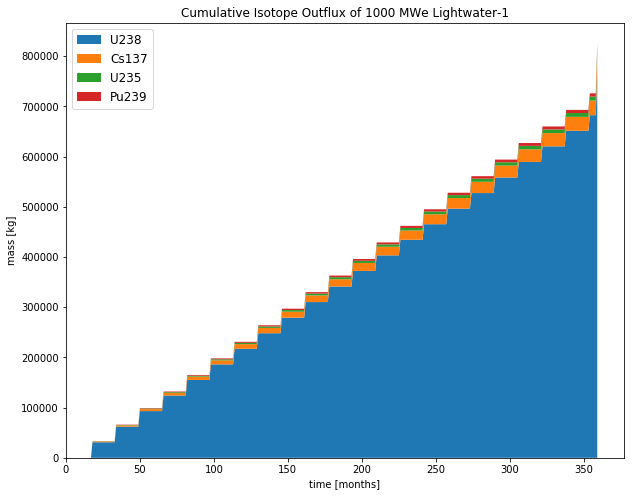

In [35]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['legend.fontsize'] = 12
facility = '1000MWe Lightwater-1'
title = 'Cumulative Isotope Outflux of 1000 MWe Lightwater-1'
analysis.plot_out_flux_cumulative(cur, facility,title)

## Ask:
* Why does 'Cumulative Isotope Outflux of 'Lightwater-1' plot only go for 360 months ?
* Why is there a spike in isotope outflux at the end of the lifetime of the  'Lightwater-1' ?

## Share: 
* What are some other reactor differences between this plot and the 'Cumulative Isotope Outflux of '1178MWe BRAIDWOOD-1' reactor. 

Let's take a look at the total mass of spent nuclear fuel stored at the Nuclear Waste Repository.
To plot, use the `analysis.plot_in_flux_cumulative(cur, facility, title)` function. 
<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `facility`      | `'NuclearRepository'` | facility of interest |
| `title`     | `'Cumulative Isotope Inventory of Repository'` | title of plot |


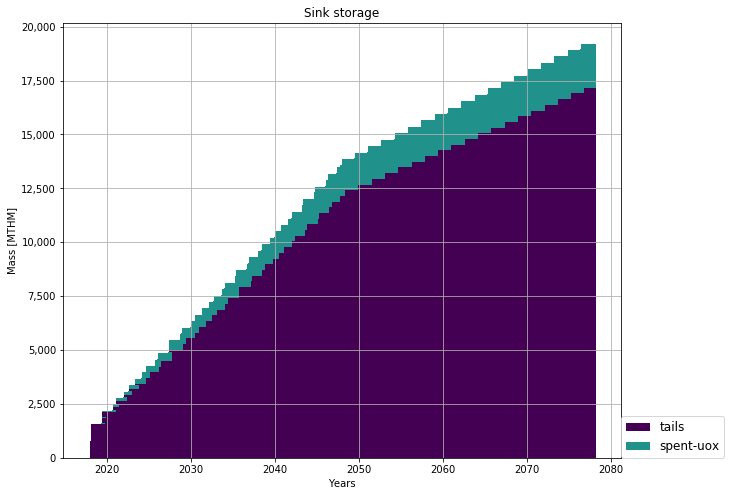

In [34]:
facility = 'NuclearRepository' # facility of interest
title  = 'Cumulative Isotope Inventory of Repository'  # title of plot

analysis.plot_commodities(cur,archetype='sink',facility_commodity=['tails','spent-uox'],title = 'Sink storage',
                          filename='sink_two',is_cum=True,is_outflux=False)
from IPython.display import Image
Image(filename='sink_two.png')

As seen in the above plot, the rate at which `tails` and `spent-uox` is stored at the `Sink` decreases considably around the year 2050 as the `Lightwater-1` reactor shuts down in the year 2048.